In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('/Users/apple/Downloads/mentalhealthsurvey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Understanding the data set 

In [4]:
df.shape

(1259, 27)

1,259 individuals participated in the survey, which comprised 27 questions.

In [5]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


The dataset includes outliers such as a minimum age of -1,726, a maximum age of 1,000,000,000, and a mean age of 7,942, which require cleaning.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness


The dataset consists of 27 columns, with some deemed irrelevant for analysis, such as the Timestamp column.

Upon observation, it's noted that the comments column contains numerous missing entries, prompting its removal.

Similarly, the state column exhibits numerous missing values, primarily due to its relevance solely to the United States.

In [7]:
df['Country'].value_counts(ascending=False)

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

Numerous countries participated in the survey, with the United States contributing the highest number of participants.

However, including countries with only one respondent may skew the analysis results.

Therefore, we will also eliminate this column from the dataset.

### Handling missing values

In [8]:
df_missing_values = df.isnull().sum().sort_values(ascending = False)
print('Below are the missing values: ')
df_missing_values

Below are the missing values: 


comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

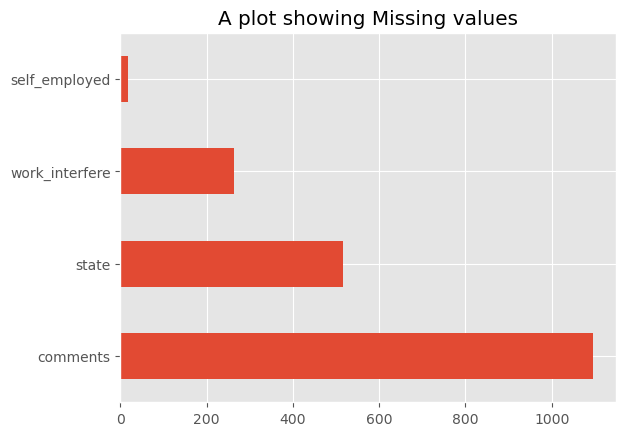

In [9]:
df_missing_values = df_missing_values[df_missing_values > 0]
plt.title('A plot showing Missing values')
df_missing_values.plot(kind='barh')
plt.show()

#### A closer look at the work_interfere column 

In [10]:
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [11]:
#Calculate the percentage of missing values in the work_interfere column 
pct_missing_work_interfere = (df['work_interfere'].isnull().sum() / len(df['work_interfere'])) * 100
pct_missing_work_interfere

20.96902303415409

The "work_interfere" column exhibits a missing data rate of 20.97%.

To address this, we will impute the missing values by replacing them with the mode, representing the most frequently occurring entry in the column.

In [12]:
mode_work_interfere = df['work_interfere'].mode()[0]
mode_work_interfere

'Sometimes'

In [13]:
df['work_interfere'] = df['work_interfere'].fillna(mode_work_interfere)

df['work_interfere'].isnull().sum()

0

We have filled the missing values in the work_interfere column.

#### A closer look at the self_employed column 

In [14]:
print(df['self_employed'].unique())

[nan 'Yes' 'No']


In [15]:
#Calculate the percentage of missing values in the work_interfere column 
pct_missing_self_employed = (df['self_employed'].isnull().sum() / len(df['self_employed'])) * 100
pct_missing_self_employed

1.4297061159650517

The "self_employed" column has 1.43% of its values missing.

To handle this, we will replace the missing values with the mode, representing the most common entry in the column.

In [16]:
mode_self_employed = df['self_employed'].mode()[0]
mode_self_employed

'No'

In [17]:
df['self_employed'] = df['self_employed'].fillna(mode_self_employed)
df['self_employed'].isnull().sum()

0

### Handling Duplicates 

In [18]:
df.duplicated().sum()

0

All the values in the dataset are unique

### Dropping Columns 

In [19]:
print(df.columns)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [20]:
df.drop(columns=['Timestamp','Country', 'state','comments'], inplace=True)

In [21]:
print("We have dropped the columns not relevant to this analysis. \n \nThe following columns are remaining: \n")
print((df.columns))

We have dropped the columns not relevant to this analysis. 
 
The following columns are remaining: 

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


### Handling Outliers and feature engineering

In [22]:
df_new = df.copy()

Handling the Age column

In [23]:
print(df['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [24]:
age_filter = df[(df['Age'] < 0) | (df['Age'] > 100)]

age_filter.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,-29,Male,No,No,No,Sometimes,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
364,329,Male,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,99999999999,All,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes
715,-1726,male,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
1127,-1,p,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [25]:
df_new.drop(age_filter.index, inplace=True)

df_new.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [26]:
print(df_new['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [27]:
df_new['Gender'].replace(['M','Male', 'male', 'm' ,'Male-ish', 'maile','Cis Male',
                          'Mal','Male (CIS)' , 'Make' , 'male leaning androgynous', 
                          'Male ', 'Man','Mail', 'cis male' ,'Malr', 'Cis Man', 
                          'ostensibly male'], 'Male', inplace=True)

In [28]:
df_new['Gender'].replace(['Female', 'female', 'Trans-female', 'Cis Female','F','Woman', 
                          'f', 'Femake', 'woman', 'cis-female/femme','Female (cis)', 
                          'femail', 'Female','Female (trans)','Trans woman', 'Female '] , 'Female', inplace=True)

In [29]:
df_new['Gender'].replace(['something kinda male?', 'queer/she/they' 'non-binary','All', 
                          'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender',
                          'Guy (-ish) ^_^','A little about you', 
                          'unsure what that really means', 'queer/she/they','non-binary', 'Nah',
                         'msle','Neuter', 'queer', 'ostensibly male', 
                          'unsure what that really means', 'ostensibly male, unsure what that really means' ], 'Other', inplace=True)

In [30]:
df_new['Gender'].value_counts()

Male      988
Female    251
Other      15
Name: Gender, dtype: int64

In [31]:
print(df_new['Gender'].unique())

['Female' 'Male' 'Other']


### We shall use barplot and countplot for univariate and bivariate analysis


We will utilize barplots and countplots for both univariate and bivariate analysis.

Given that the majority of the variables are categorical, it's essential to determine the percentage of each category to facilitate comparison. This step is crucial for understanding the variables effectively. To compute these percentages, we will employ the value_counts method and visualize the results using barplots.

In the bivariate analysis, we will compare the percentage distribution of the categorical variable with the target variable, which, in this scenario, represents the treatment status.

Due to the repetitive nature of these plots, creating a method to generate them will streamline the analysis process.

### Creating a generic function to handle all the univarite bar ploting in Seaborn

In [32]:
def bar_plot(df, column,title=None, xlabel=None, ylabel=None, annotate=True):
    
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")

    
    ### calculate the percentage of the catergorical value using value counts
    pct_variable = (df[column].value_counts(normalize=True)
                    .rename_axis(column)
                    .reset_index(name='Percentage')
                   )
                    
    
    ### Creating a barplot using the column and percentage 
    ax = sns.barplot(x=column, y='Percentage', data=pct_variable)
    
    ### Adding annotations
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x,y = p.get_xy()
        ax.annotate(f'{height:.0%}', (x + width/2, y + height), ha='center')
        
    ### Customzing plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return ax

### Creating a generic function to plot a counterplot for bivariate analysis

In [33]:
def count_plot(df, x=None, y=None, hue=None,title=None, xlabel=None, ylabel=None):
    
    ### Checking if the column is in the dataframe
    if (x is not None and x not in df.columns) or (hue is not None and hue not in df.columns):
        raise ValueError(f"The variables inserted are not in the DataFrame.")
        
    ### ploting the count plot
    ax = sns.countplot(x=x, data=df, hue=hue)
    
    ### customizing plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return ax

### Understanding the target variable, age and gender of the survey participants

#### 1. Target variable - Treatment

All survey participants are afflicted with a type of mental disorder. The following graph aims to understand whether they are undergoing treatment or not.

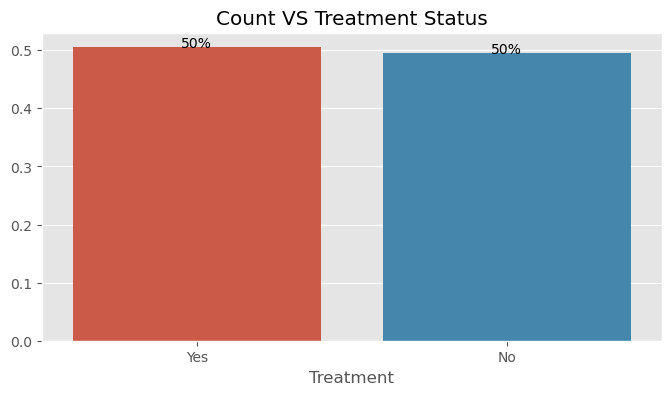

In [34]:
plt.figure(figsize = (8,4))
ax = bar_plot(df_new, column='treatment', title='Count VS Treatment Status', xlabel='Treatment')   
plt.show()

The outcome depicted above indicates that half of the survey participants are undergoing treatment, while the remaining half are not receiving any form of treatment.

#### 2. We aim to comprehend the distribution of survey participants undergoing treatment based on their gender.

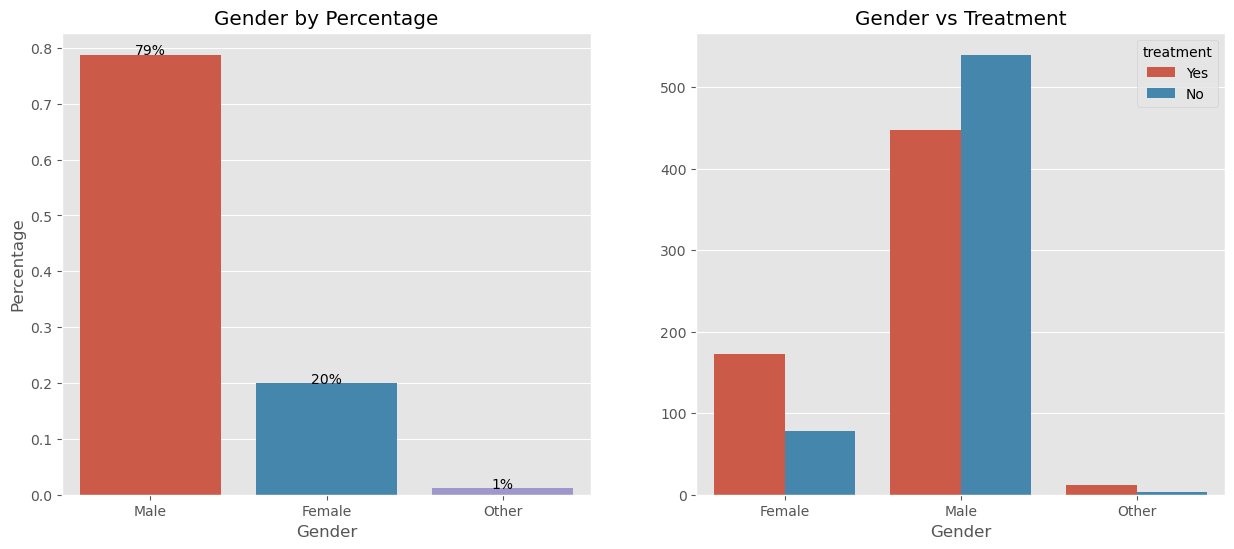

In [35]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
ax = bar_plot(df_new, 'Gender', title='Gender by Percentage',
              xlabel='Gender', ylabel='Percentage')

plt.subplot(1,2,2)
bx = count_plot(df_new, x='Gender', hue='treatment',
                title='Gender vs Treatment', xlabel='Gender')

plt.show()


The male participants in the survey outnumbered females by nearly threefold. Only 1% of respondents identified with a gender other than male or female. This is most likely due to the fact that there are more males in the tech industry than females.

Upon analyzing treatment status, it became evident that a significant portion of female participants nearly twice the number of women were undergoing treatment, whereas the majority of male participants were not seeking treatment.
Men are less likely to disclose their mental health status.

#### 3. We seek to comprehend the survey participants who are either self-employed or employed taking medication

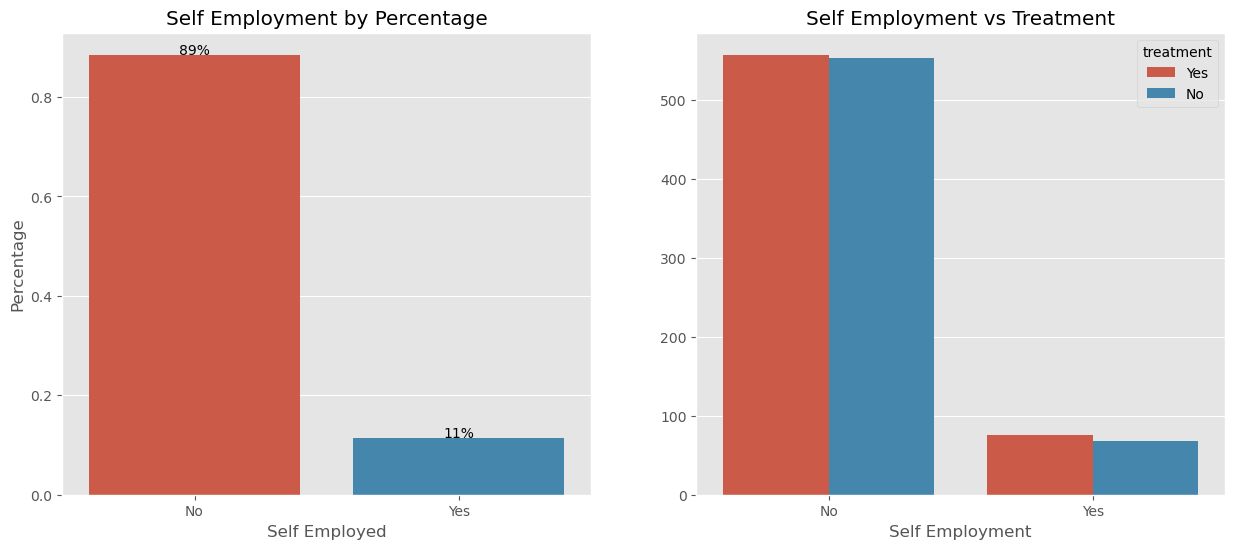

In [36]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
ax = bar_plot(df_new, 'self_employed', title='Self Employment by Percentage',
              xlabel='Self Employed', ylabel='Percentage')

plt.subplot(1,2,2)
bx = count_plot(df_new, x='self_employed', hue='treatment',
                title='Self Employment vs Treatment', xlabel='Self Employment')

plt.show()


89% of the survey participants are under fulltime employment. 

The employment status has no significant effect on the status of people undertaking mediciation. Both categories give mental health attention.

#### 4. Exploring the impact of mental health cases with the family on treatment patterns.

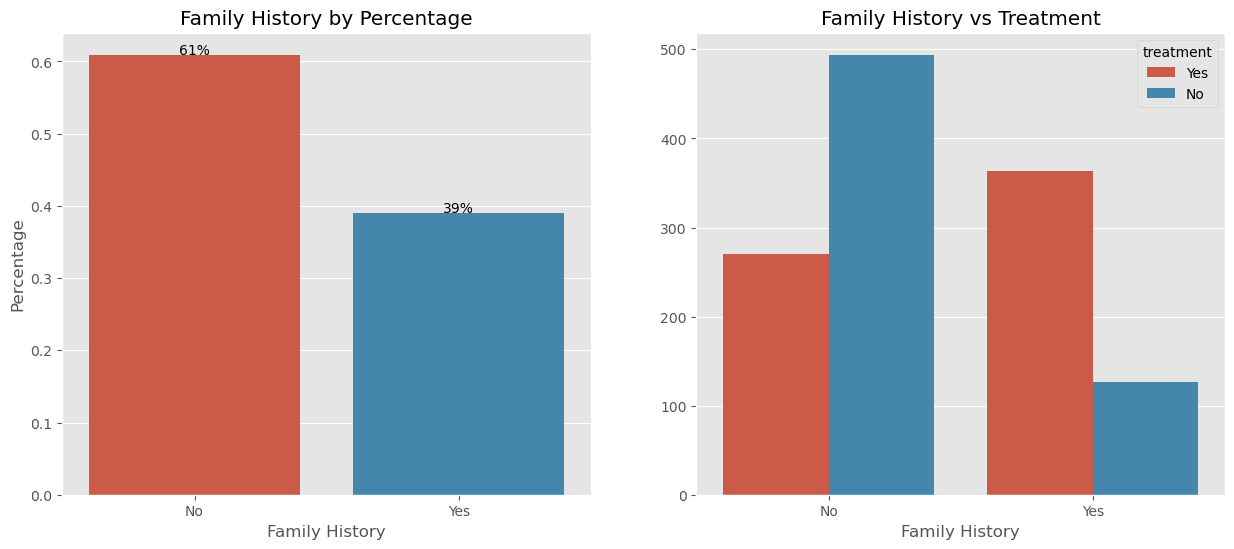

In [37]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
ax = bar_plot(df_new, 'family_history', title='Family History by Percentage',
              xlabel='Family History', ylabel='Percentage')

plt.subplot(1,2,2)
bx = count_plot(df_new, x='family_history', hue='treatment',
                title='Family History vs Treatment', xlabel='Family History')

plt.show()


39% of participants have a history of mental health cases within their family, while 61% do not. This discrepancy may stem from the fact that mental health issues are often acquired rather than strictly hereditary.

Participants with a family history of mental health issues are three times more likely to seek treatment compared to those without such a history. This inclination likely arises from the firsthand experiences and awareness of the challenges associated with mental health conditions within these families.

####  5. Investigating the level a mental health condition interferes with the participants work

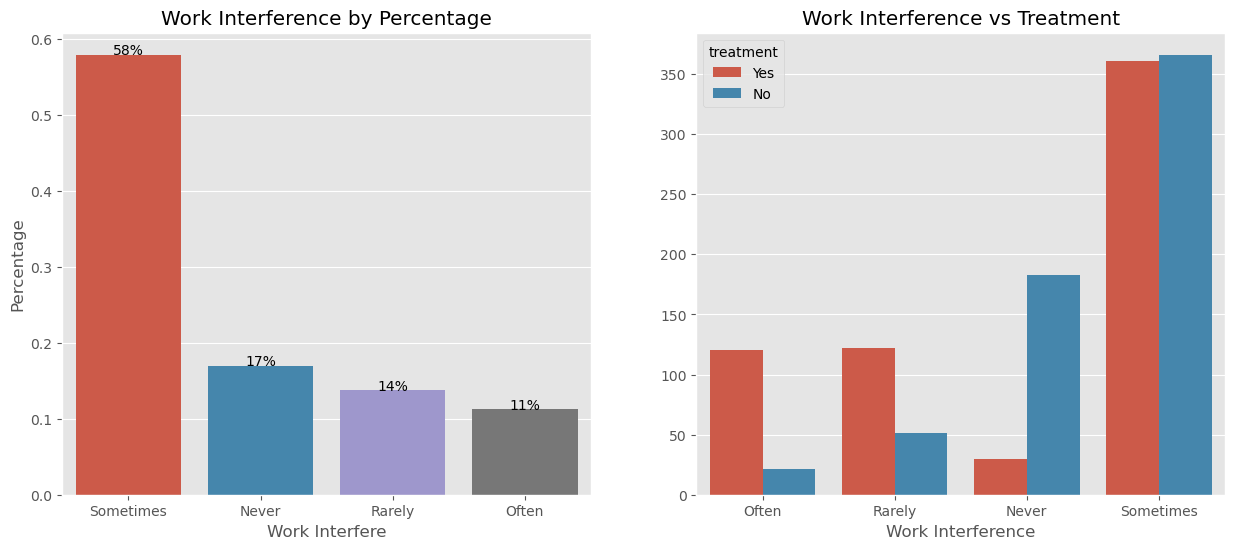

In [38]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
ax = bar_plot(df_new, 'work_interfere', title='Work Interference by Percentage',
              xlabel='Work Interfere', ylabel='Percentage')

plt.subplot(1,2,2)
bx = count_plot(df_new, x='work_interfere', hue='treatment',
                title='Work Interference vs Treatment', xlabel='Work Interference')

plt.show()

Individuals frequently affected by mental health conditions are comparatively fewer, potentially due to employers' reluctance to hire individuals with such conditions. The survey suggests that participants experiencing mental health conditions rarely, never, or sometimes may have additional influencing factors beyond solely their mental health status.

Those whose mental health conditions impact their job performance are four times more inclined to seek medical assistance. Conversely, participants whose conditions seldom affect their work routine may refrain from seeking medical attention, possibly due to keeping their condition undisclosed in the workplace.

#### 6. Does company size influence mental health case and their treatment?

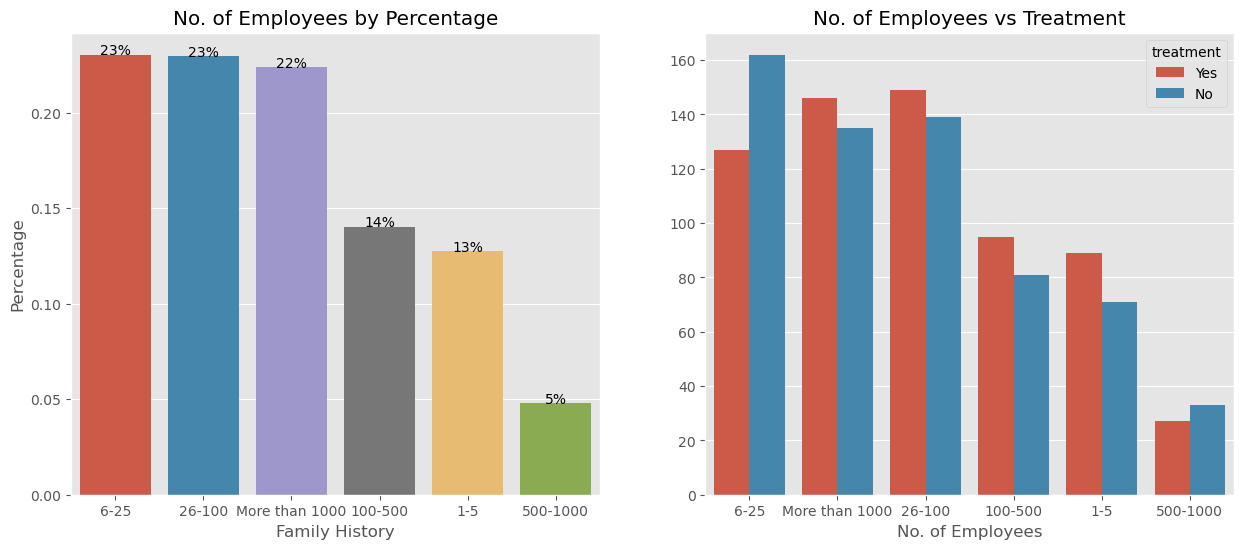

In [39]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
ax = bar_plot(df_new, 'no_employees', title='No. of Employees by Percentage',
              xlabel='Family History', ylabel='Percentage')

plt.subplot(1,2,2)
bx = count_plot(df_new, x='no_employees', hue='treatment',
                title='No. of Employees vs Treatment', xlabel='No. of Employees')

plt.show()

The analysis reveals that mental health conditions are not necessarily determined by the size of the company. However, overall, smaller companies are more prone to experiencing mental health issues due to pressure to make more profits.

Irrespective of company size, individuals tend to seek medical attention when facing mental health challenges.

#### 7. Assessing the Impact of Remote Working on Mental Health Treatment.

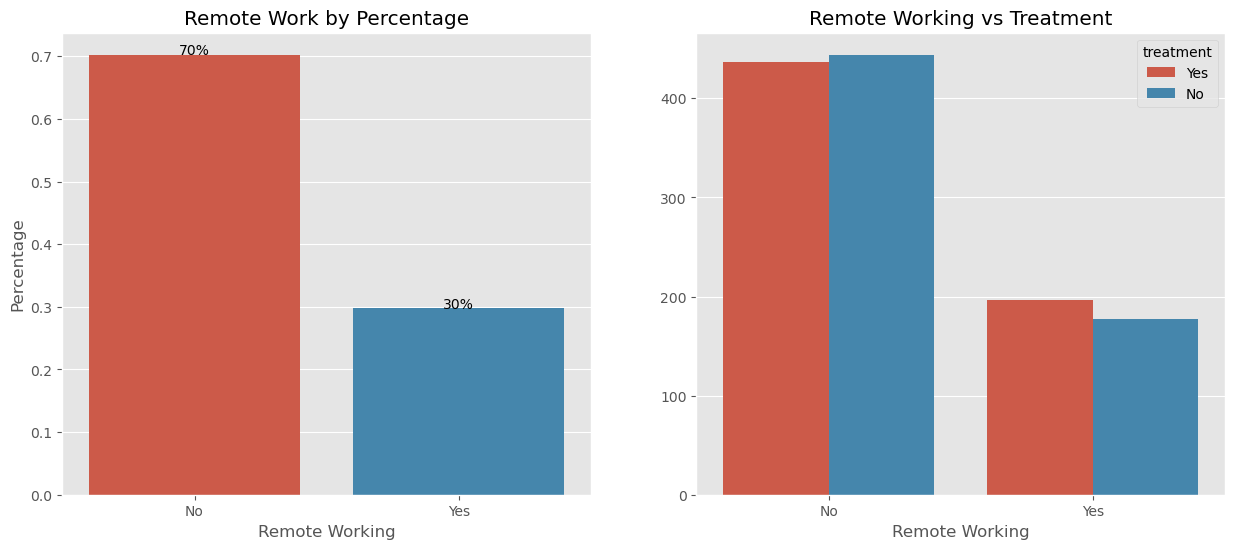

In [40]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
ax = bar_plot(df_new, 'remote_work', title='Remote Work by Percentage',
              xlabel='Remote Working', ylabel='Percentage')

plt.subplot(1,2,2)
bx = count_plot(df_new, x='remote_work', hue='treatment',
                title='Remote Working vs Treatment', xlabel='Remote Working')

plt.show()

Out of the total, 70% of individuals commute to the office for work, while the remaining 30% work remotely. 

A comparison between these two groups reveals that remote workers are more inclined to seek treatment compared to those who commute to the office.

#### 8.  Exploring the effects of mental health employer benefits on treatment

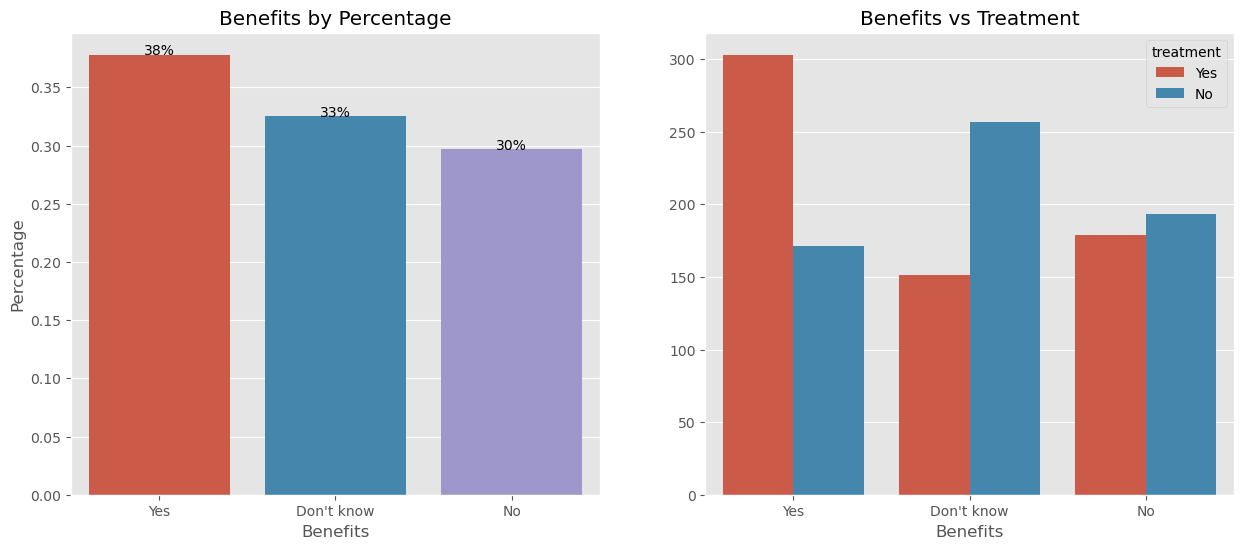

In [41]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
ax = bar_plot(df_new, 'benefits', title='Benefits by Percentage',
              xlabel='Benefits', ylabel='Percentage')

plt.subplot(1,2,2)
bx = count_plot(df_new, x='benefits', hue='treatment',
                title='Benefits vs Treatment', xlabel='Benefits')

plt.show()


The majority of employers have initiated benefits aimed at supporting their employees' mental health.

Employees in companies offering such mental health benefits are twice as likely to seek medication compared to those without such benefits or those unaware of them. Conversely, employees who are uncertain about their benefits are the least likely to seek medication.

#### 9. Exploring the Relationship Between Employer Attention to Mental Health and Employee Medical Attention

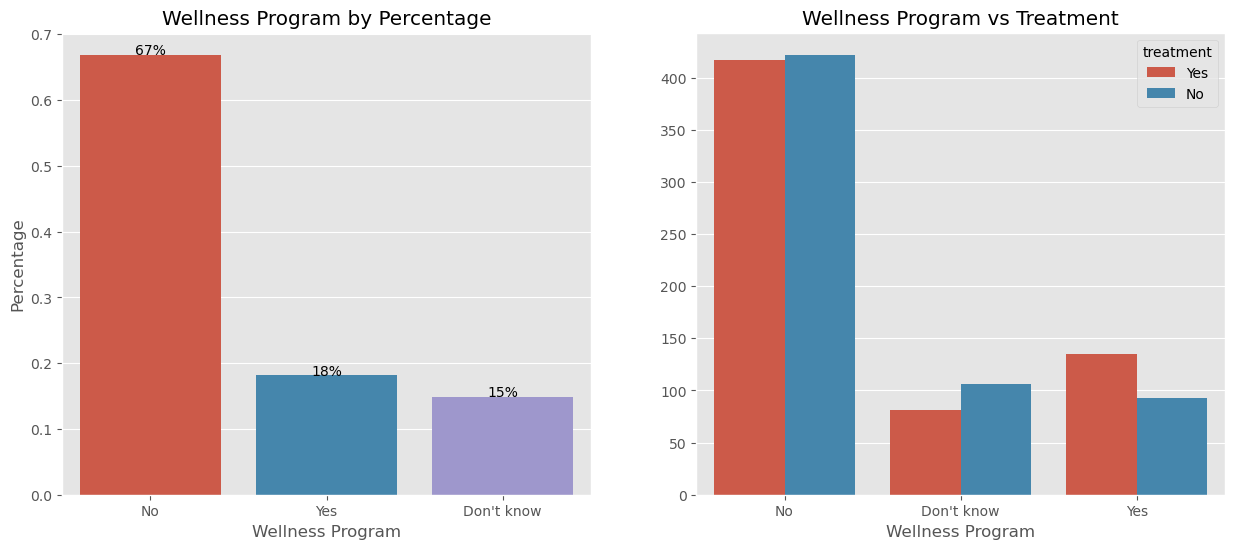

In [42]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
ax = bar_plot(df_new, 'wellness_program', title='Wellness Program by Percentage',
              xlabel='Wellness Program', ylabel='Percentage')

plt.subplot(1,2,2)
bx = count_plot(df_new, x='wellness_program', hue='treatment',
                title='Wellness Program vs Treatment', xlabel='Wellness Program')

plt.show()

67% of employers do not prioritize mental health in their wellness programs, often focusing on other areas instead.

This analysis reveals that individuals whose employers address mental health in their wellness programs are more likely to seek medical attention compared to those whose employers do not prioritize mental health or do not provide any wellness programs.

#### 10. Does discussing mental health issues with employers have negative consequences?

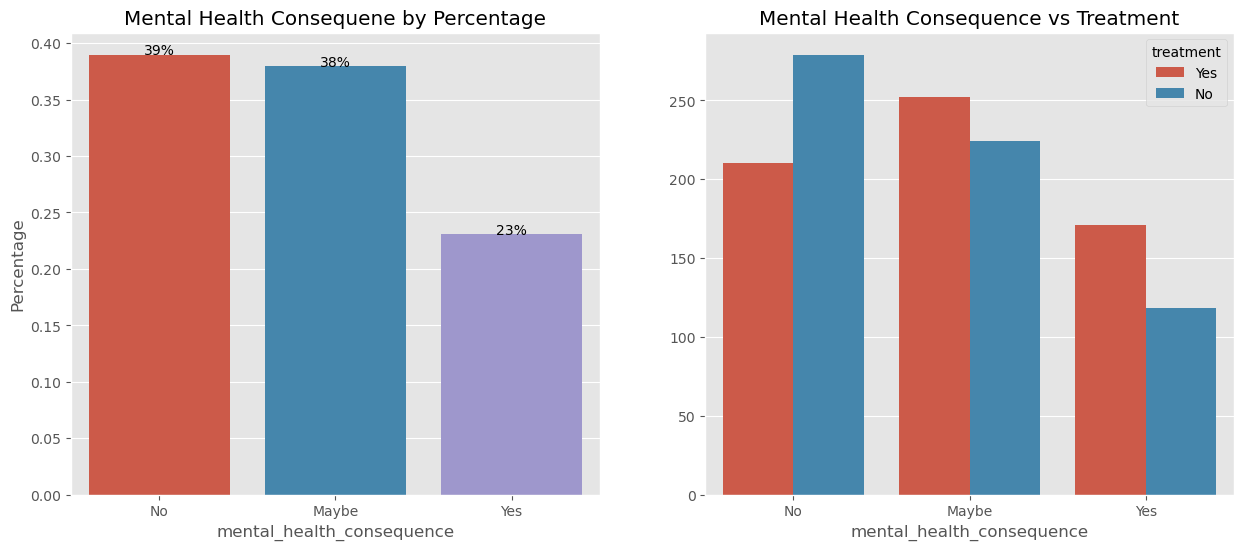

In [43]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
ax = bar_plot(df_new, 'mental_health_consequence', title='Mental Health Consequene by Percentage',
              xlabel='mental_health_consequence', ylabel='Percentage')

plt.subplot(1,2,2)
bx = count_plot(df_new, x='mental_health_consequence', hue='treatment',
                title='Mental Health Consequence vs Treatment', xlabel='mental_health_consequence')

plt.show()

On a general scale, employers are more understanding even when employees disclose their mental health status. However, some employers have not clearly spelled out the consquences of employees disclore of their status. 

### Summary of Observations and Recommendations

1. The distribution of individuals taking medication for mental health is nearly even, influenced by various factors.

2. While men experience mental health issues at a higher rate, women are twice as likely to pursue medical help. It's advised that men be encouraged to undergo regular mental health check-ups and seek treatment.

3. Self-employed individuals show a lower incidence of mental health problems compared to their employed counterparts. Nonetheless, both groups demonstrate a readiness to seek medical assistance for mental health concerns.

4. Mental health issues are not strictly inheritable but can have a familial pattern. Those with a family history of mental health problems are more likely to prioritize treatment over individuals facing these issues for the first time.

5. Employment opportunities for individuals frequently impacted by mental health challenges are limited. Employed individuals facing such issues often receive prompt treatment support from their employers.

6. The company size appears to be unrelated to the prevalence of mental health issues, though smaller companies tend to report higher instances according to the survey.

7. Despite the tech industry's advancements, only 30% of survey respondents work remotely. Remote workers place a higher emphasis on mental health treatment, possibly due to a larger proportion being self-employed.

8. Awareness of mental health is growing among employers, many of whom have introduced benefits aimed at promoting mental well-being among employees. Those with access to these targeted benefits are more inclined to seek treatment when facing mental health challenges.

9. Discussing mental health issues with employers generally does not lead to negative repercussions. According to the survey, this openness has encouraged a more proactive approach to seeking treatment among employees. Those fearful of negative consequences or uncertain of their employer's response tend to prioritize medical attention more.

10. Employers should clearly communicate the implications of employees disclosing their mental health status.